---
**<center><h1>Advertisement - Click on Ad</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset contains fake advertising data with features such as consumer demographics (age, gender), behavioral metrics (time spent on site, daily internet usage), and geographic details (city, country). **The main objective is to predict whether a consumer clicked on an advertisement** based on these features. This predictive model can help advertisers optimize ad targeting and campaign effectiveness.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download gabrielsantello/advertisement-click-on-ad -f  advertising.csv

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad
License(s): other
advertising.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
data = pd.read_csv("advertising.csv").copy()

# **Take a look at the data**
---

In [7]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
data.select_dtypes(include=['object']).describe()

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


In [11]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

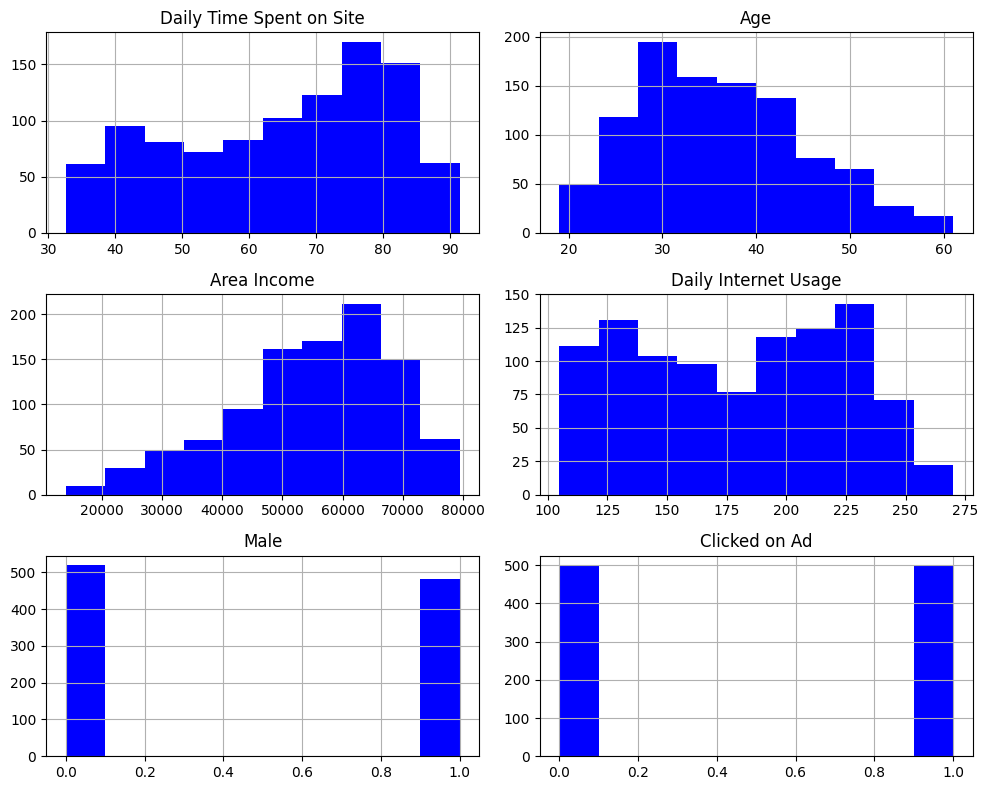

In [12]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

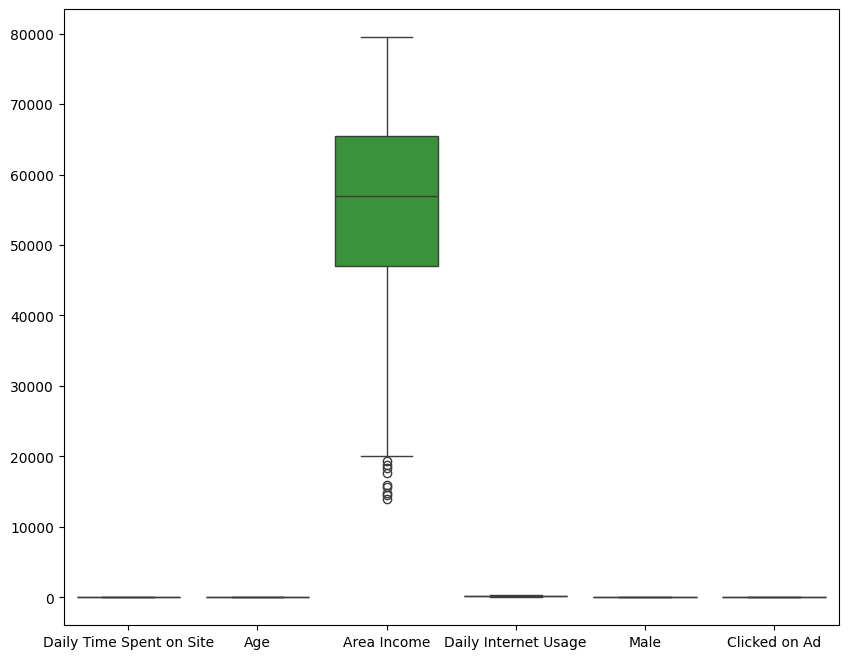

In [13]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

**Multivariate Analysis**

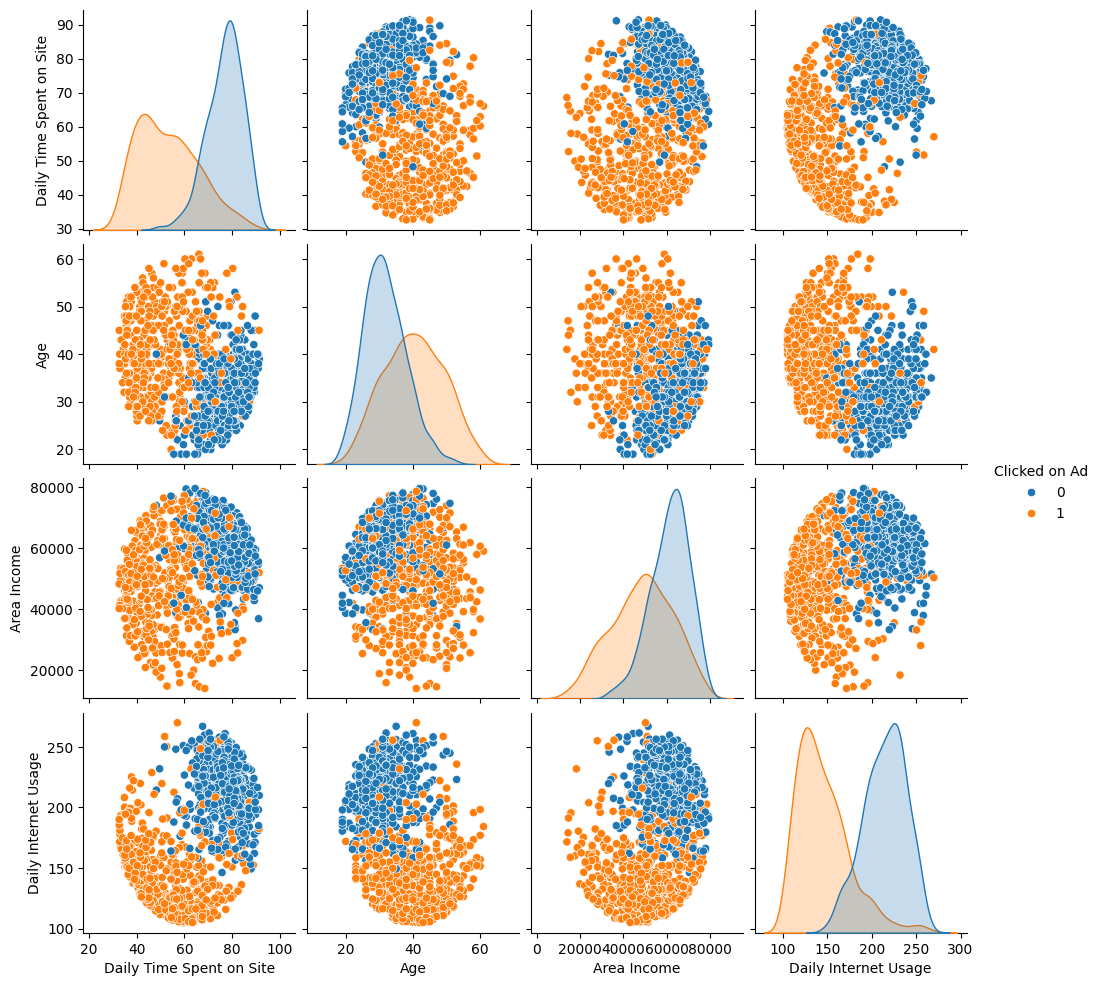

In [15]:
sns.pairplot(data.drop("Male",axis=1), hue='Clicked on Ad')

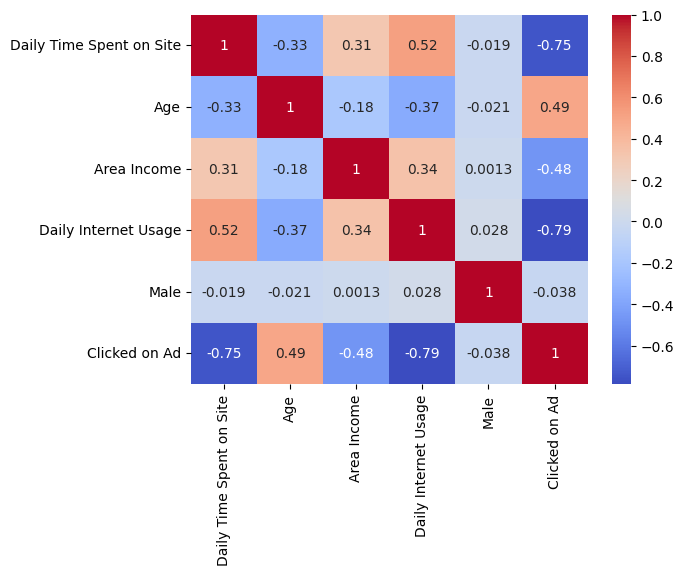

In [16]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [17]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [18]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Daily Time Spent on Site,0,0.0
Age,0,0.0
Area Income,0,0.0
Daily Internet Usage,0,0.0
Ad Topic Line,0,0.0
City,0,0.0
Male,0,0.0
Country,0,0.0
Timestamp,0,0.0
Clicked on Ad,0,0.0


In [19]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

In [20]:
#data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Daily Time Spent on Site'] = data['Daily Time Spent on Site'].astype(float)

In [21]:
data = data.drop('Ad Topic Line', axis=1)
data = data.drop('Timestamp', axis=1)

**Encoding Categorical Variables**

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

**Data splitting**

In [23]:
from sklearn.model_selection import train_test_split
X = data.drop(['Clicked on Ad'], axis=1)
Y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=44)

In [24]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
357,49.84,39,45800.48,111.59,238,0,183
645,46.14,28,39723.97,137.97,439,1,65
271,73.04,37,73687.50,221.79,200,1,187
400,35.98,47,55993.68,165.52,900,1,61
342,88.12,38,46653.75,230.91,269,0,79


In [25]:
print(X_train.dtypes)

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
City                          int64
Male                          int64
Country                       int64
dtype: object


**Data Normalization**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude=['object']))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude=['object']))

X_train[X_train.select_dtypes(exclude=['object']).columns] = X_train_scaled
X_test[X_test.select_dtypes(exclude=['object']).columns] = X_test_scaled

# **Modeling**

In [27]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

In [28]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name}: Accuracy = {accuracy:.2f}')

Logistic Regression: Accuracy = 0.96
Decision Tree: Accuracy = 0.92
Random Forest: Accuracy = 0.94
K-Nearest Neighbors: Accuracy = 0.94
Support Vector Machine: Accuracy = 0.95
Naive Bayes: Accuracy = 0.96
AdaBoost: Accuracy = 0.94
Gradient Boosting: Accuracy = 0.94
